# ***ASSIGNMENT 3***
## ***QUESTION 2***

---



## **IMPORTS**


---



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sb
from scipy.io import loadmat

%matplotlib inline

## **PREPROCESSING**

---



***LOAD THE MNIST DATASET, SAVE THE DATA TO mnistDataset AND THE LABELS TO mnistLabels.***

In [ ]:
mnist = loadmat("/content/mnist-original.mat")
mnistDataset = mnist["data"].T
mnistLabels = mnist["label"][0]

***Size of each image is set to 28x28 pixels.***

In [ ]:
imageSize = int(np.sqrt(mnistDataset.shape[1]))
print(imageSize,'x',imageSize)

28 x 28


***Display a random image from the dataset.***

IMAGE LABEL:  0.0


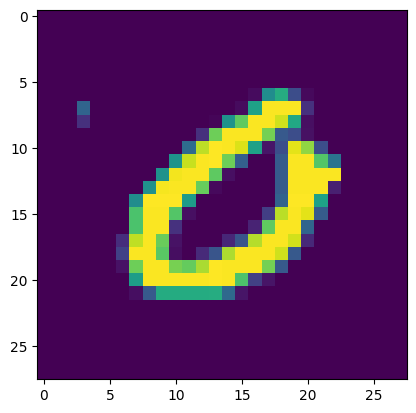

In [ ]:
imageID = np.random.randint(7000)
expectedLabel = mnistDataset[imageID].reshape(imageSize,imageSize)
print("IMAGE LABEL: ", mnistLabels[imageID])
plt.imshow(expectedLabel)

***Create a function to normalize the data.***

In [ ]:
def normalizeData(data):
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)
    normalizedData = (data - mean)/std
    return normalizedData

In [ ]:
mnistNormalized = normalizeData(mnistDataset)

***Apply common parameters for X and Y training and testing split.***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(mnistNormalized,
                                                    mnistLabels,
                                                    test_size    = 0.20,
                                                    random_state = 42)
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

***Display the shapes of the X and Y training and testing vectors and matrices.***

In [ ]:
print("TRAINING MATRIX (X) : ", X_train.shape)
print("TRAINING VECTOR (Y) : ", Y_train.shape)
print("TESTING MATRIX  (X) : ", X_test.shape)
print("TESTING VECTOR  (Y) : ", Y_test.shape)

TRAINING MATRIX (X) :  (56000, 784)
TRAINING VECTOR (Y) :  (56000, 1)
TESTING MATRIX  (X) :  (14000, 784)
TESTING VECTOR  (Y) :  (14000, 1)


## **GENERATE MODEL FUNCTIONS**

---



In [ ]:
def initializer(nbr_features):
    W = np.zeros((nbr_features,1))
    B = 0
    return W, B

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def ForwardBackProp(X, Y, W, B):
    m = X.shape[0]
    dw = np.zeros((W.shape[0],1))
    dB = 0

    Z = np.dot(X,W)+B
    Yhat = sigmoid(Z)
    J = -(1/m)*(np.dot(Y.T,np.log(Yhat))+np.dot((1-Y).T,np.log(1-Yhat)))
    dW = (1/m)*np.dot(X.T,(Yhat-Y))
    dB = (1/m)*np.sum(Yhat-Y)
    return J, dW, dB

def predict(X,W,B):
    Yhat_prob = sigmoid(np.dot(X,W)+B)
    Yhat = np.round(Yhat_prob).astype(int)
    return Yhat, Yhat_prob

def gradient_descent(X, Y, W, B, alpha, max_iter):
    i = 0
    RMSE = 1
    cost_history=[]

    # setup toolbar
    toolbar_width = 20
    sys.stdout.write("[%s]" % ("" * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

    while (i<max_iter)&(RMSE>10e-6):
        J, dW, dB = ForwardBackProp(X,Y,W,B)
        W = W - alpha*dW
        B = B - alpha*dB
        cost_history.append(J)
        Yhat, _ = predict(X,W,B)
        RMSE = np.sqrt(np.mean(Yhat-Y)**2)
        i+=1
        if i%50==0:
            sys.stdout.flush()

    return cost_history, W, B, i

def LogRegModel(X_train, X_test, Y_train, Y_test, alpha, max_iter):

    nbr_features = X_train.shape[1]
    W, B = initializer(nbr_features)
    cost_history, W, B, i = gradient_descent(X_train, Y_train, W, B, alpha, max_iter)
    Yhat_train, _ = predict(X_train, W, B)
    Yhat, _ = predict(X_test, W, B)

    train_accuracy = accuracy_score(Y_train, Yhat_train)
    test_accuracy = accuracy_score(Y_test, Yhat)
    conf_matrix = confusion_matrix(Y_test, Yhat, normalize='true')

    model = {"weights": W,
            "bias": B,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "confusion_matrix": conf_matrix,
            "cost_history": cost_history}
    return model

## **SAMPLE RUN ON DIGIT 0**

---



In [ ]:
model0 = LogRegModel(X_train,
                     X_test,
                    (Y_train==0).astype(int),
                     (Y_test==0).astype(int),
                     alpha=0.01,
                     max_iter=500)

[]

In [ ]:
print('Training accuracy = ',model0['train_accuracy']*100)
print('Testing accuracy  = ',model0['test_accuracy']*100)

Training accuracy =  98.64464285714286
Testing accuracy  =  98.55000000000001


## **RUN MODEL ON EACH DIGIT IN MNIST DATASET**

---



In [ ]:
# Creating and training a model for each digit

models=[]
modelsID=['0','1','2','3','4','5','6','7','8','9']
yTraining=[(Y_train== 0).astype(int),
           (Y_train== 1).astype(int),
           (Y_train== 2).astype(int),
           (Y_train== 3).astype(int),
           (Y_train== 4).astype(int),
           (Y_train== 5).astype(int),
           (Y_train== 6).astype(int),
           (Y_train== 7).astype(int),
           (Y_train== 8).astype(int),
           (Y_train== 9).astype(int)]

yTesting = [(Y_test== 0).astype(int),
            (Y_test== 1).astype(int),
            (Y_test== 2).astype(int),
            (Y_test== 3).astype(int),
            (Y_test== 4).astype(int),
            (Y_test== 5).astype(int),
            (Y_test== 6).astype(int),
            (Y_test== 7).astype(int),
            (Y_test== 8).astype(int),
            (Y_test== 9).astype(int)]

for i in range(10):
    print('TRAINING : ', modelsID[i])
    model = LogRegModel(X_train, X_test, yTraining[i], yTesting[i], alpha=0.01, max_iter=1000)
    print('Accuracy:', model['test_accuracy'])
    print('_____________________________________________________________________\n')
    models.append(model)

TRAINING :  0
[]Accuracy: 0.9875
_____________________________________________________________________

TRAINING :  1
[]Accuracy: 0.9917857142857143
_____________________________________________________________________

TRAINING :  2
[]Accuracy: 0.9753571428571428
_____________________________________________________________________

TRAINING :  3
[]Accuracy: 0.9692142857142857
_____________________________________________________________________

TRAINING :  4
[]Accuracy: 0.9796428571428571
_____________________________________________________________________

TRAINING :  5
[]Accuracy: 0.9651428571428572
_____________________________________________________________________

TRAINING :  6
[]Accuracy: 0.9831428571428571
_____________________________________________________________________

TRAINING :  7
[]Accuracy: 0.9806

***Calculate the average accuracy.***

In [ ]:
modelAccuracies = []

for i in range(len(models)):
    modelAccuracies.append(models[i]['test_accuracy'])

meanAccuracy = np.mean(modelAccuracies)
print('AVEGERAGE ACCURACY : ', meanAccuracy*100)

AVEGERAGE ACCURACY :  97.29928571428572


## **MODEL FOR DIGIT CLASSIFICATION**

---



In [ ]:
def finalPredictionModel(data, models):

    labels = []

    predictionMatrix = np.zeros((data.shape[0],10))

    for i in range(len(models)):
        W = models[i]['weights']
        B = models[i]['bias']

        Yhat, Yhat_prob = predict(data,W,B)
        predictionMatrix[:,i] = Yhat_prob.T

    max_prob_vec = np.amax(predictionMatrix, axis=1, keepdims=True)
    predictionMatrix_max_prob = (predictionMatrix == max_prob_vec).astype(int)

    for j in range(predictionMatrix_max_prob.shape[0]):
        imageID = np.where(predictionMatrix_max_prob[j,:]==1)
        labels.append(imageID)

    labels = np.vstack(labels).flatten()
    return labels

In [ ]:
predictedLabel = finalPredictionModel(X_test, models)

conf_matrix = confusion_matrix(Y_test, predictedLabel)

def confusionMatrix(mat,y_true,ax,case):
    if case == 0:
        df_cm = pd.DataFrame(mat, columns=np.unique(y_true), index = np.unique(y_true))
        df_cm.index.name = 'TRUE LABEL'
        df_cm.columns.name = 'PREDICITON'
        sb.heatmap(df_cm, cmap="Blues", cbar=False, annot=True,annot_kws={"size": 10}, ax=ax)

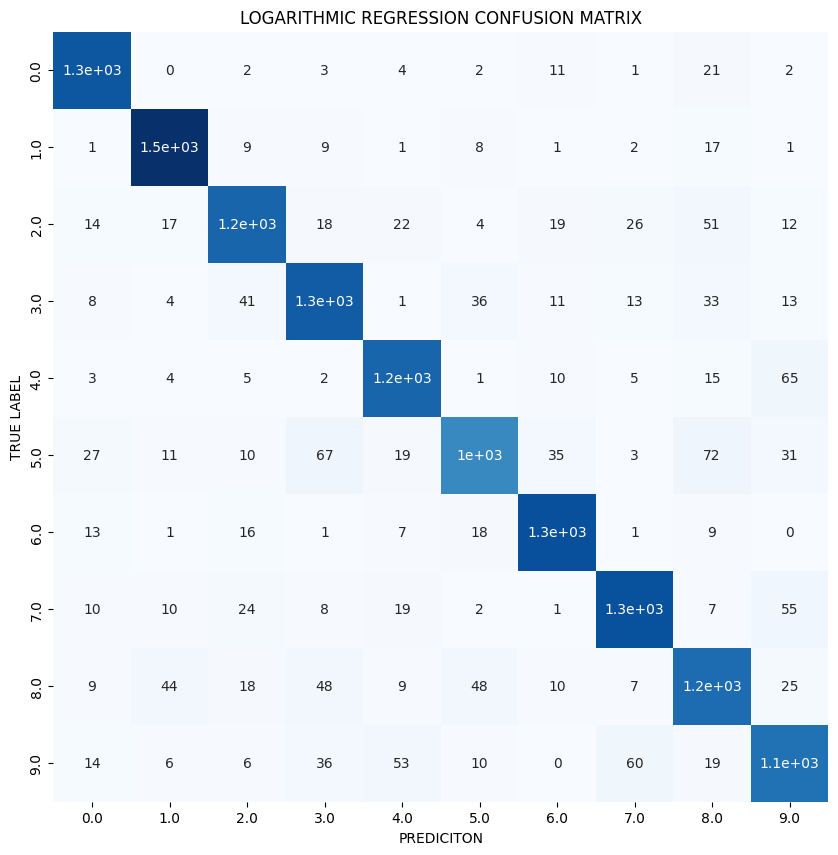

In [ ]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
plt.title('LOGARITHMIC REGRESSION CONFUSION MATRIX')
confusionMatrix(conf_matrix, Y_test, ax1,0)

In [ ]:
examples_number = 10
index_random_sample = np.random.randint(70000, size=(1,examples_number))
example = mnistNormalized[index_random_sample].reshape(examples_number ,784)
true_labels = mnistLabels[index_random_sample].flatten().astype(int)
label = finalPredictionModel(example, models)

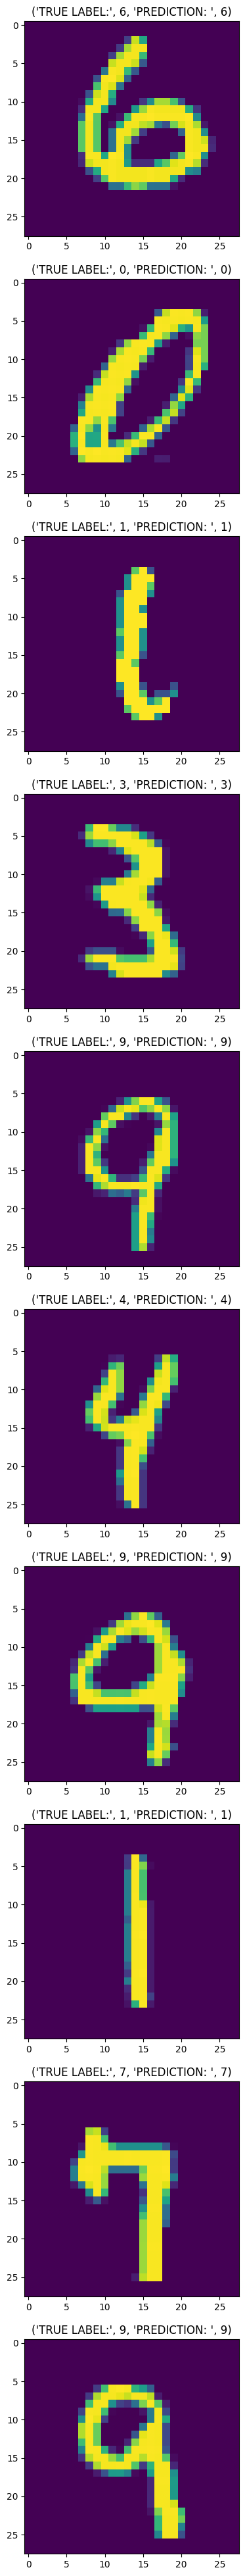

In [ ]:
plt.figure(figsize=(50,50))
for i in range(examples_number):
    image = example[i].reshape(imageSize,imageSize)
    plt.subplot(10, 1,i+1)
    plt.imshow(image)
    title = "TRUE LABEL:", true_labels[i], "PREDICTION: ", label[i]
    plt.title(title)

## ***DISCUSSION***

### As shown in this notebook, the L2-regularized multiclass logistic regression shows advantages when applied to the MNIST dataset. <br>
### Firstly, it effectively prevented the model overfitting by adding a penalty term to the loss function, improving generalization and applying simpler weight configurations. <br>
### Secondly, logistic regression is particularly suitable for linearly separable problems, which is the case with MNIST dataset.
### Using L2 logistic regression algorithm resulted in an average accuracy of 97.299%.